In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

GADGET Test
======

In [2]:
from containers import GadgetData
import numpy as np
import matplotlib.pyplot as plt

First, we'll set up the positions in a similar way:

In [3]:
diff_right = 0.0

positions_left = [x/10. for x in range(0, 250)]
positions_right = [x - diff_right for x in range(26, 100, 1)]
positions = positions_left + positions_right

Now we must consider the energies. This is fairly simple due to the way that we set up the positions:

In [4]:
energies_left = [1.0] * len(positions_left)
energies_right = [10.0] * len(positions_right)
energies = energies_left + energies_right

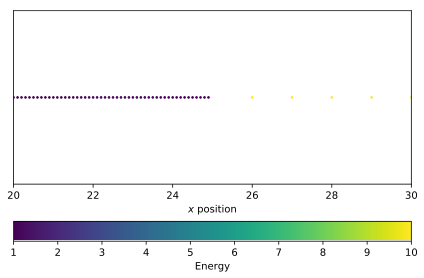

In [5]:
plt.scatter(positions, [0]*len(positions), c=energies, s=3)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.colorbar(orientation="horizontal", label="Energy")
plt.gca().axes.yaxis.set_visible(False)
plt.tight_layout()

Looks good! Now we can pass these to our SPH stuff:

(note that $\eta = 5$ is equivalent to 20 neighbors in 1D).

In [6]:
positions = list(reversed(positions))
energies = list(reversed(energies))
data = GadgetData(positions, energies, eta=5)

Calculating smoothing lengths
Calculating densities
Calculating pressures


Text(0.5,1,'Density Distribution')

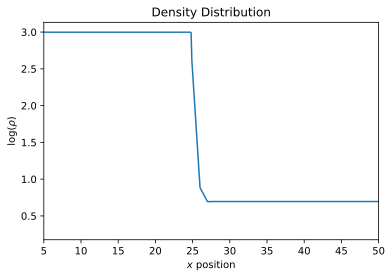

In [7]:
plt.plot(data.positions, np.log(data.densities))
plt.xlim(5, 50)
plt.ylabel(r"log($\rho$)")
plt.xlabel("$x$ position")
plt.title("Density Distribution")

Text(0.5,1,'Pressure Distribution')

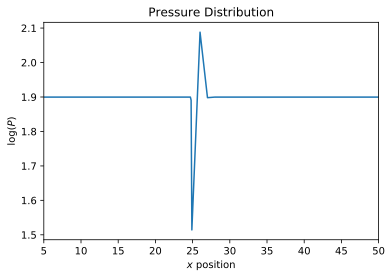

In [8]:
plt.plot(data.positions, np.log(data.pressures))
plt.xlim(5, 50)
plt.xlabel("$x$ position")
plt.ylabel("log($P$)")
plt.title("Pressure Distribution")

Text(0.5,1,'Internal Energy Distribution')

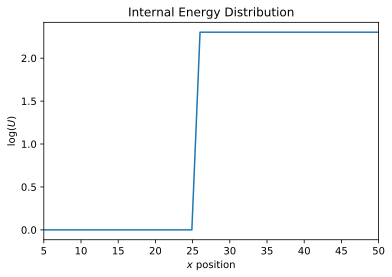

In [9]:
plt.plot(data.positions, np.log(data.energies))
plt.xlim(5, 50)
plt.xlabel("$x$ position")
plt.ylabel("log($U$)")
plt.title("Internal Energy Distribution")

Text(0.5,1,'Smoothing Length')

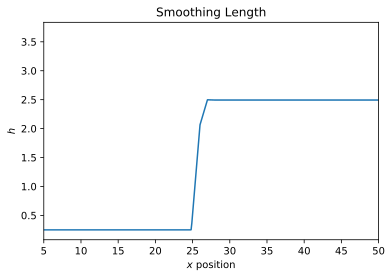

In [10]:
plt.plot(data.positions, data.smoothing_lengths)
plt.xlim(5, 50)
plt.xlabel("$x$ position")
plt.ylabel("$h$")
plt.title("Smoothing Length")